### Part 1: Decision trees

In this exercise you will implement the decision making algorithm of a decision tree classifier, step by step.

In [18]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

sns.set()

>**Ex. 5.1.2**: Split your data into two subsets. One where characters are affiliated with X-men and one where they are not.
1. What is the entropy of target labels in each subset?
2. What is the weighted average entropy of the split?
3. Write a function that computes the weighted average entropy of a split, given the data and team (name or id) on which to split the data.
4. Plot the distribution of split entropy for all features. Comment on the result. My figure looks [like this](http://ulfaslak.com/computational_analysis_of_big_data/exer_figures/example_6.2.2.4.png).

In [9]:
# Load data from machine_learning1.ipynb
marvel = pd.read_csv("marvel.csv",index_col=0)
marvel_features = marvel.iloc[:,:-1]
marvel_target = marvel.faction 

In [21]:
def compute_entropy(sdata):
    size = 1.0*len(sdata)
    count = Counter(sdata.faction)
    dist = [1.0 * x/size for x in count.values()]
    return size,shannon(dist)

In [22]:
def shannon(p):
    """Computes the Shannon Entropy of a given list of probabilities"""
    return -1.0*sum([x*np.log2(x) for x in p])

def compute_avg_ent_feature(pdata, feature):
    """DOCSTRING"""
    #solves for entropy of a split
    
    
    #split that contains this feature
    side_1 = pdata[pdata[feature] == 1]
    
    #split that does not contain this feature
    side_2 = pdata[pdata[feature] == 0]
    
    #compute the entropy of both brances and store their sizes
    s1, ent_1 = compute_entropy(side_1)
    s2, ent_2 = compute_entropy(side_2)
    
    #compute the entropy of the main and the size
    p1, entropy_before = compute_entropy(pdata)
    
    #weight_1*entropy_1 + weight_2*entropy_2 
    entropy_after = ((s1/p1)*ent_1 + (s2/p1)*ent_2)
    
    return entropy_after



In [6]:
compute_avg_ent_feature(marvel,"X-Men")

1.3303827580272767

Computing average of split entropy...[647 / 647]

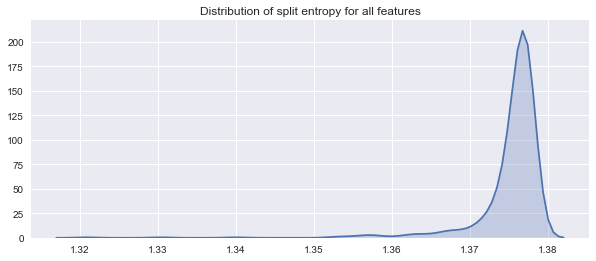

In [19]:
# Plot the distribution of split entropy for all features
import sys
def plot_entropy(data):
    all_entropy = []
    for progress,column in enumerate(data):
        if column != 'faction':
            all_entropy.append(compute_avg_ent_feature(data,column))
            sys.stdout.write("\rComputing average of split entropy...[%d / %d]" % (progress+1,len(marvel.columns)-1))
    sys.stdout.flush()

    plt.figure(figsize=(10,4))
    plt.title("Distribution of split entropy for all features")
    sns.kdeplot(all_entropy, shade=True)

    plt.show()
plot_entropy(marvel)

### >**Ex. 5.1.3**: Print the maximum entropy path of a decision tree.
>
>1. Implement the following pseudocode and print the output:<br><br>
>Step 1. Find `team` that gives lowest split entropy for `data`. Print `team`.<br>
>Step 2. Split `data` on `team`, to produce `data0` and `data1`. Print the entropy of each, as well as their weighted avg. entropy.<br>
>Step 3. Overwrite the `data` variable with either `data0` or `data1`, depending on which has the highest entropy.<br>
>Step 4. Stop if there are less than 5 datapoints in `data`. Otherwise start over from 1.<br><br>
>My output looks [like this](http://ulfaslak.com/computational_analysis_of_big_data/exer_figures/example_6.2.3.1.png) for the first five splits.<br><br>
>
>2. Comment on decision path your code takes: How splits are there? Do you notice anything interesting about the final splits? Why do we choose to stop splitting before `data` get smaller than 5?

>3. Train a `sklearn.tree.DecisionTreeClassifier` classifier on the dataset. Initiate the classifier with `criterion='entropy'`. What are the most important features of this classifier? How does this line up with the order of the order of splits you just printed (a comment is fine)?

In [23]:
def lowest_split_entropy(data):
    lowest = 2 #start with any integer. The highest entropy was about ~1.4
    team_name = ""
    for team in data:
        if team != 'faction':
            team_entropy = compute_avg_ent_feature(data,team)
            if team_entropy < lowest:
                lowest = team_entropy
                team_name = team
    return team_name


def max_entropy_path(data):
    path = 0
    while data.shape[0] > 6: 
        lowest_team = lowest_split_entropy(data)
        headline = "Split %d: %s" % (path,lowest_team)
        print (headline + "\n" + "="*len(headline))

        s1,ent_1 = compute_entropy(data[data[lowest_team]==1])
        s2,ent_2 = compute_entropy(data[data[lowest_team]==0])

        print ("   data0:\n      size: %d\n      entropy: %.4f\n" % (s1, ent_1))
        print ("   data1:\n      size: %d\n      entropy: %.4f" % (s2, ent_2))
        print ("\n-->   average entropy: %.4f\n\n" % compute_avg_ent_feature(data,lowest_team))

        if ent_1 > ent_2:
            data = data[data[lowest_team]==1]
        else:
            data = data[data[lowest_team]==0]
        path += 1
    return path
path = max_entropy_path(marvel)
print ("Max entropy path: %d" % path)

Split 0: Avengers
   data0:
      size: 95
      entropy: 0.6150

   data1:
      size: 1190
      entropy: 1.3773

-->   average entropy: 1.3209


Split 1: X-Men
   data0:
      size: 98
      entropy: 1.0164

   data1:
      size: 1092
      entropy: 1.3528

-->   average entropy: 1.3251


Split 2: Masters of Evil
   data0:
      size: 70
      entropy: 0.6587

   data1:
      size: 1022
      entropy: 1.3575

-->   average entropy: 1.3127


Split 3: Maggia
   data0:
      size: 25
      entropy: -0.0000

   data1:
      size: 997
      entropy: 1.3658

-->   average entropy: 1.3324


Split 4: X-Men-In-Training
   data0:
      size: 19
      entropy: -0.0000

   data1:
      size: 978
      entropy: 1.3673

-->   average entropy: 1.3413


Split 5: New Warriors
   data0:
      size: 34
      entropy: 0.9112

   data1:
      size: 944
      entropy: 1.3588

-->   average entropy: 1.3433


Split 6: Guardians of the Galaxy
   data0:
      size: 13
      entropy: -0.0000

   data1:
      

KeyboardInterrupt: 

In [21]:
import sklearn.tree
tree_classifier = sklearn.tree.DecisionTreeClassifier(criterion='entropy')
tree_classifier = tree_classifier.fit(marvel_features,marvel_target)

x = tree_classifier.apply(marvel_features)
print(x.shape)

(1285,)


In [20]:
import graphviz
from sklearn import tree
import sklearn.tree

dot_data = tree.export_graphviz(tree_classifier)
graph = graphviz.Source(dot_data)
graph.render("marvel_tree_classifier")

'marvel_tree_classifier.pdf'

### Part 2 (extra): Dimensionality reduction (PCA and ICA)

The point of this exercise is to learn how to visualize high-dimensional data, and get a feeling of how your Marvel data looks when projected to a plane.

>**Ex. 5.2.1**: Apply a PCA transformation to your data. If `X` is your feature matrix, PCA works like:

>        pca = sklearn.decomposition.PCA()
>        pca.fit(X)
>        X_pca = pca.transform(X)

>1. What is the dimensionality of `X_pca` compared to `X`? What happened to `X` when you transformed it?
2. Plot the first two components/columns of the transformed data and color the points by their class label. My plot looks [like this](http://ulfaslak.com/computational_analysis_of_big_data/exer_figures/example_6.1.1.2.png). Comment on the result. What would plotting two other components against each other show you?
3. Plot the explained variance ratio of each component. What does this tell you about the dataset? My plot looks [like this](http://ulfaslak.com/computational_analysis_of_big_data/exer_figures/example_6.1.1.3.png).

>*Hint for 2: `plt.scatter` takes an argument `color` which must receive either a string such as `red` or `blue`, or a list of rgb values or strings such as `['red', 'blue', 'blue', ...]`.*

In [54]:
import sklearn.decomposition
pca = sklearn.decomposition.PCA()

pca.fit(marvel_features)
X_pca = pca.transform(marvel_features)

In [55]:
# Stayed the same
print (X_pca.shape, marvel_features.shape)

(1285, 647) (1285, 647)


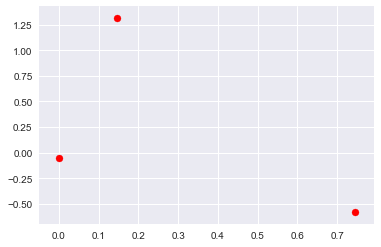

In [53]:
plt.scatter(X_pca[0], X_pca[1],color='red')

>**Ex. 5.2.2**: In a similar fashion, apply an ICA transformation to your data.

>1. Read about [ICA](https://en.wikipedia.org/wiki/Independent_component_analysis).
2. Plot the the transformed data on a number of different ICA components. Color the points by their class label. Comment on the differences between the result of ICA and PCA.